To solve any problem in machine learning, we have to follow some steps.
    1. Problem formation
    2. Data collection
    3. Algorithm/Method selection
    4. Evaluate

In [4]:
import numpy as np
import pandas as pn
import math as m
import random as rand

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X = pn.read_csv("X.csv",header=None)


In [18]:
X = np.asarray(X)
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
Y = pn.read_csv("Y.csv",header=None)

In [19]:
Y = np.asarray(Y)

Y.shape
print(Y)

[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [20]:
#visualising
digit = X[1600 , :]
digitm = np.reshape(digit, (20,20) )

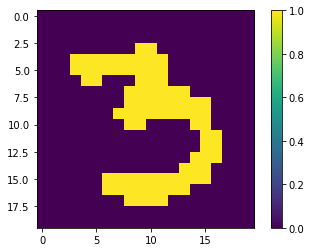

1


In [10]:
import matplotlib.pyplot as plt

plt.imshow(( np.reshape( X[1600, :], (20,20) )) .T); #20,20 as the rectangle size is same for all pics now
plt.colorbar()
plt.show()

print(Y[500,0])           #a row from X gives the image, corresponding row from Y gives the label


### Using KNN to solve the problem

In [11]:
def cmp_to_key(mycmp):
    'Convert a cmp= function into a key= function'
    class K(object):
        def __init__(self, obj, *args):
            self.obj = obj
        def __lt__(self, other):
            return mycmp(self.obj, other.obj) < 0
        def __gt__(self, other):
            return mycmp(self.obj, other.obj) > 0
        def __eq__(self, other):
            return mycmp(self.obj, other.obj) == 0
        def __le__(self, other):
            return mycmp(self.obj, other.obj) <= 0  
        def __ge__(self, other):
            return mycmp(self.obj, other.obj) >= 0
        def __ne__(self, other):
            return mycmp(self.obj, other.obj) != 0
    return K

def greater(a,b):
    if (a[1] > b[1]):
        return 1
    return -1

In [15]:

def PredictDigitUsingKNN(X,Y,test,k):
    Dis = []
    
    #getting the distance
    for i in range (0, X.shape[0]):
        distance = (X[i,:] - test) ** 2 
        distance = m.sqrt(sum(distance))
        
        some = [Y[i,0], distance]
        Dis.insert(i, some)
    
    
    #sorting for the neighbours
    Dis.sort(key = cmp_to_key(greater))
    
    
    #Counting to see which neighbour occures the most
    cnt = [0,0,0,0,0,0,0,0,0,0];
    
    for i in range (0, k):
        for j in range (0, 10):
            if (Dis[i][0] == j):
                cnt[j] = cnt[j] + 1
            elif (Dis[i][0] == 10):
                cnt[0] = cnt[0] + 1
                
    #print(cnt)
    
    maxm = max(cnt)
    maxi = 0
    
    for j in range (0, 10):
        if (cnt[j] == maxm):
            maxi = j      
    
    return maxi



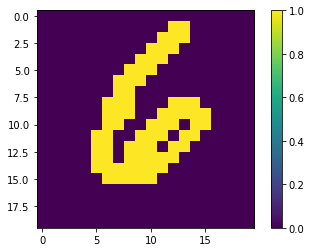

In [16]:
test_X = X[3000 , :]
plt.imshow(( np.reshape( test_X, (20,20) )) .T); #20,20 as the rectangle size is same for all pics now
plt.colorbar()
plt.show()




In [17]:
res = PredictDigitUsingKNN(X, 
                           , test_X, 100)
print(res)


6
